In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the csv file
bitstamp = pd.read_csv("/content/drive/MyDrive/Hackatoons/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
bitstamp

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


In [3]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [4]:
# Converting the Timestamp column from string to datetime
bitstamp['Timestamp'] = [datetime.fromtimestamp(x) for x in bitstamp['Timestamp']]

In [5]:
bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('Dataset Shape: ',  bitstamp.shape)

Dataset Shape:  (4572257, 8)


Visualising the Time Series data

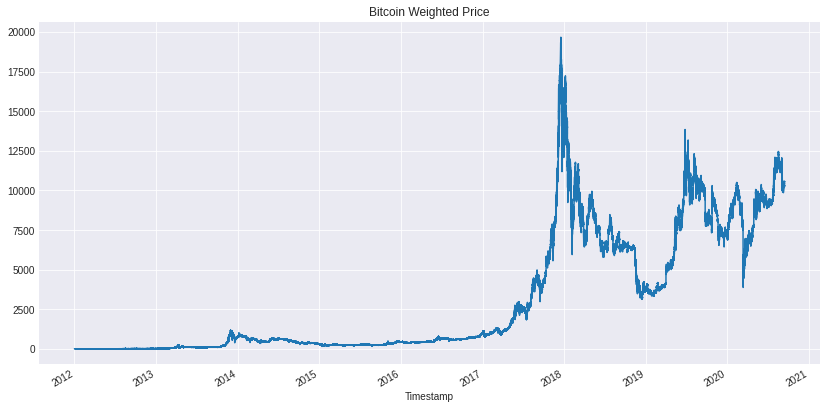

In [7]:
bitstamp.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

Handling Missing Values in Time-series Data

In [8]:
#calculating missing values in the dataset

missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


Imputations Techniques for non Time Series Problems

In [9]:
#testing missing value methods on a subset

pd.set_option('display.max_rows', 1500)

a = bitstamp.set_index('Timestamp')

a = a['2019-11-01 00:15:00':'2019-11-01 02:24:00']

a['ffill'] = a['Weighted_Price'].fillna(method='ffill') # Imputation using ffill/pad
a['bfill'] = a['Weighted_Price'].fillna(method='bfill') # Imputation using bfill/pad
a['interp'] = a['Weighted_Price'].interpolate()         # Imputation using interpolation

a

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ffill,bfill,interp
Timestamp,,,,,,,,,,
2019-11-01 00:15:00,9132.07,9132.07,9131.28,9132.06,2.790997,25486.770016,9131.781301,9131.781301,9131.781301,9131.781301
2019-11-01 00:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9131.781301,9124.030314,9127.905808
2019-11-01 00:17:00,9133.46,9133.46,9124.00,9124.00,4.615205,42109.267498,9124.030314,9124.030314,9124.030314,9124.030314
2019-11-01 00:18:00,9127.51,9127.91,9123.83,9123.83,0.115982,1058.256390,9124.345653,9124.345653,9124.345653,9124.345653
2019-11-01 00:19:00,9123.68,9127.88,9119.24,9119.24,0.844218,7702.491217,9123.816937,9123.816937,9123.816937,9123.816937
2019-11-01 00:20:00,9126.28,9127.91,9125.71,9125.71,0.041975,383.073893,9126.269690,9126.269690,9126.269690,9126.269690
2019-11-01 00:21:00,9126.87,9127.90,9112.05,9118.12,2.015965,18385.049732,9119.727734,9119.727734,9119.727734,9119.727734
2019-11-01 00:22:00,9117.64,9131.03,9116.99,9131.03,9.102945,83046.782409,9123.067760,9123.067760,9123.067760,9123.067760
2019-11-01 00:23:00,9131.54,9134.49,9119.13,9128.74,2.181277,19900.076044,9123.129221,9123.129221,9123.129221,9123.129221


Imputation using Linear Interpolation method

In [10]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [11]:
fill_missing(bitstamp)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 07:53:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 07:54:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 07:55:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 07:56:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [12]:
#created a copy 
bitstamp_non_indexed = bitstamp.copy()

In [13]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


Exploratory Data Analysis

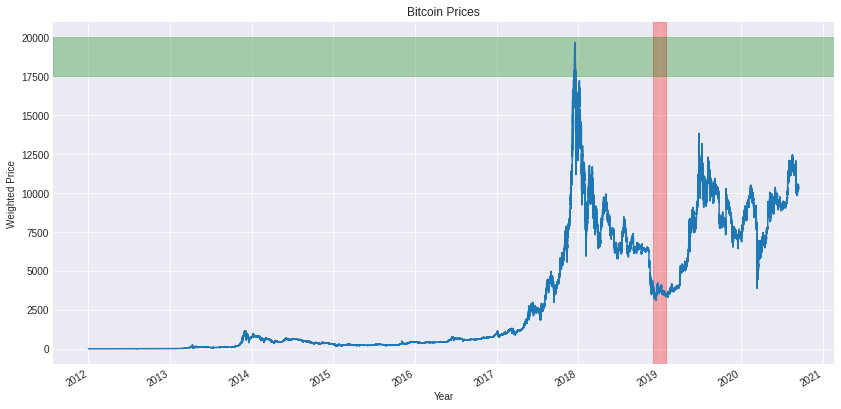

In [14]:
ax = bitstamp['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

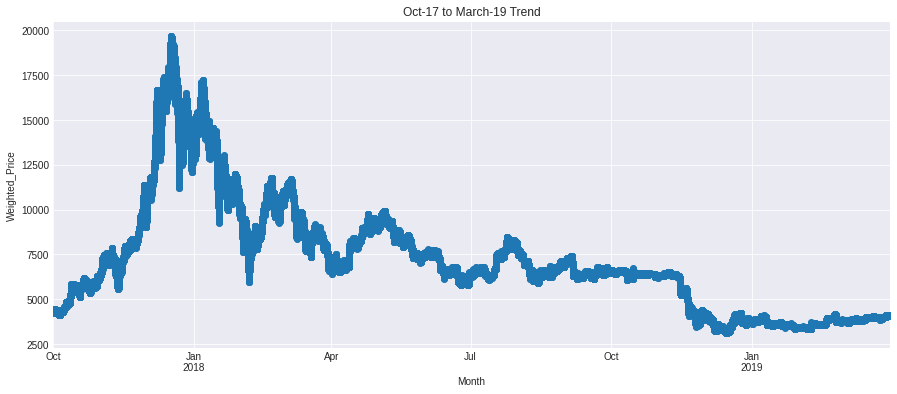

In [15]:
ax = bitstamp.loc['2017-10':'2019-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

Visualising using KDEs

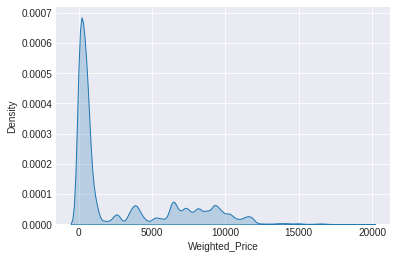

In [16]:
sns.kdeplot(bitstamp['Weighted_Price'], shade=True)

Visualizing using Lag Plots

No handles with labels found to put in legend.


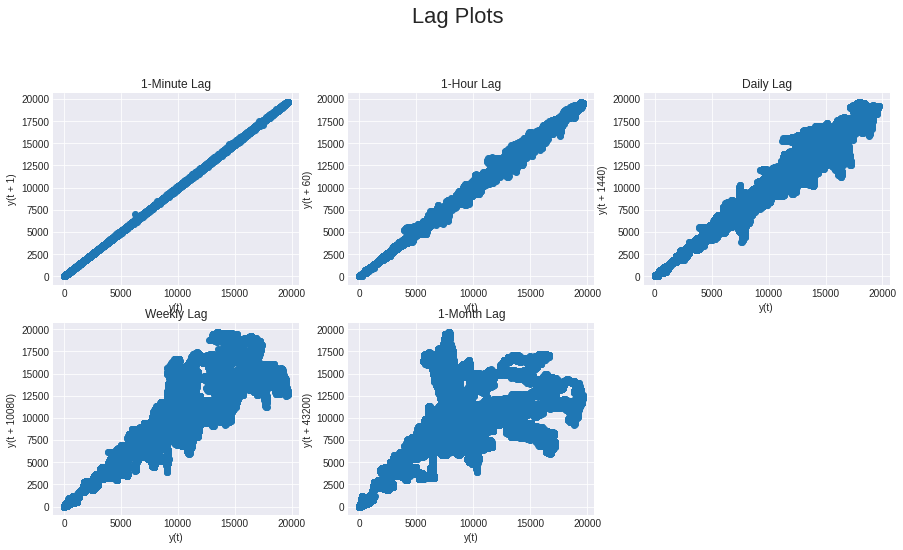

In [17]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(bitstamp['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [18]:
hourly_data = bitstamp.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.803709,3.528285,4.39
1,2011-12-31 08:00:00,4.39,4.39,4.39,4.39,4.185530,18.374477,4.39
2,2011-12-31 09:00:00,4.39,4.39,4.39,4.39,10.153449,44.573640,4.39
3,2011-12-31 10:00:00,4.39,4.39,4.39,4.39,16.121368,70.772803,4.39
4,2011-12-31 11:00:00,4.39,4.39,4.39,4.39,22.089286,96.971967,4.39


In [19]:
bitstamp_daily = bitstamp.resample("24H").mean() #daily resampling

In [20]:
import plotly.express as px

bitstamp_daily.reset_index(inplace=True)
fig = px.line(bitstamp_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [21]:
plot_ = bitstamp_daily.set_index("Timestamp")["2017-12"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [24]:
fill_missing(bitstamp_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.476415  4.478946  4.476415  4.478946     17.940426   
1 2012-01-01  4.765576  4.765576  4.765576  4.765576      6.790640   
2 2012-01-02  5.006549  5.006549  5.006549  5.006549     15.183373   
3 2012-01-03  5.206530  5.206530  5.206530  5.206530      7.917041   
4 2012-01-04  5.202511  5.241699  5.202511  5.241699     13.659736   

   Volume_(Currency)  Weighted_Price  
0          79.495594        4.477370  
1          32.971105        4.765576  
2          75.932706        5.006549  
3          40.795994        5.206530  
4          72.860096        5.216680  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


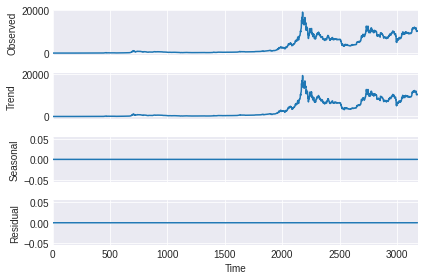

<Figure size 1080x864 with 0 Axes>

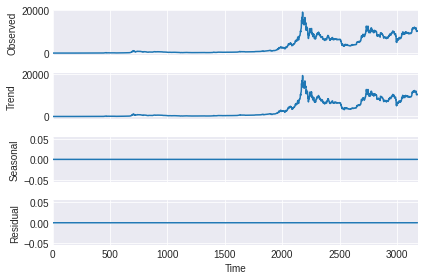

In [25]:
plt.figure(figsize=(15,12))
series = bitstamp_daily.Weighted_Price
result = seasonal_decompose(series.values,freq=1)
result.plot()

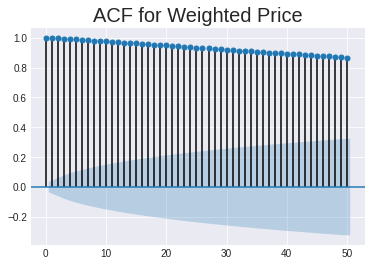

In [26]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Weighted Price", size=20)
plt.show()

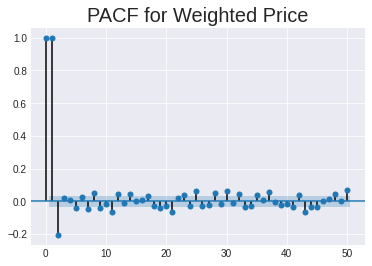

In [27]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Weighted Price", size=20)
plt.show()

KPSS Test

In [28]:
stats, p, lags, critical_values = kpss(series, 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [29]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.971974343041707
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [30]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [31]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                   -1.257922
p-value                           0.648197
#Lags Used                       29.000000
Number of Observations Used    3151.000000
Critical Value (1%)              -3.432427
Critical Value (5%)              -2.862458
Critical Value (10%)             -2.567259
dtype: float64
Series is Stationary


Feature Extraction
Rolling windows

In [32]:
df = bitstamp_daily.set_index("Timestamp")

In [33]:
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,3070.007835,3063.529743,...,3023.843754,70.836828,118.491226,269.127206,9.811957,9.817411,9.825918,3.522567,4.288554,5.298253
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,...,4.478946,70.836828,118.491226,269.127206,17.940426,17.940426,17.940426,3.522567,4.288554,5.298253
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,...,4.622261,0.202678,0.202678,0.202678,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,...,4.750357,0.264130,0.264130,0.264130,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,...,4.864400,0.220794,0.313900,0.313900,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543


In [34]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370,3070.007835,3063.529743,...,9.811957,9.817411,9.825918,3.522567,4.288554,5.298253,12,52,31,5
2012-01-01,2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576,4.476415,4.476415,...,17.940426,17.940426,17.940426,3.522567,4.288554,5.298253,1,52,1,6
2012-01-02,2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549,4.620996,4.620996,...,12.365533,12.365533,12.365533,7.884089,7.884089,7.884089,1,1,2,0
2012-01-03,2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530,4.749513,4.749513,...,13.304813,13.304813,13.304813,5.807423,5.807423,5.807423,1,1,3,1
2012-01-04,2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680,4.992885,4.863768,...,9.963685,11.957870,11.957870,4.555332,5.453543,5.453543,1,1,4,2


Model Building

In [35]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (258, 42)


ARIMA Model

In [36]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 36.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [37]:
import pmdarima as pm

In [38]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month', 'week',
       'day', 'day_of_week']
       

In [39]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=38878.640, Time=94.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40085.697, Time=8.50 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39089.500, Time=25.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39256.270, Time=34.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40107.873, Time=36.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=38867.910, Time=42.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=38904.013, Time=42.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=39045.056, Time=36.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=38873.369, Time=15.66 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=38871.961, Time=43.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=39030.052, Time=40.56 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=38874.504, Time=46.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=38865.941, Time=39.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=38902.278, Time=40.05 sec
 ARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
print(forecast)

[ 7195.87580419  7150.70343117  7046.28632163  7082.59044494
  7108.13623772  7158.6915072   7442.08656835  7841.86395062
  8176.71483119  8199.78075934  8147.69013686  7975.96057186
  7954.20943236  8030.80631993  8466.73025732  8645.97760362
  8583.9635549   8842.72262584  8797.03169026  8775.12567631
  8686.21800623  8743.35817661  8604.03957434  8523.45286164
  8465.76461483  8327.72843216  8258.81879537  8360.90850158
  8774.76037504  9055.72136629  9259.61379941  9388.7399986
  9388.65485912  9210.60677828  9166.20860688  9178.62701988
  9162.56275756  9324.02354139  9708.45652143  9920.1171632
 10002.8924183   9881.10122235  9835.40804304  9898.40943357
 10115.302075   10188.13856244 10212.93554251 10094.86014904
  9881.03293931  9713.64958767  9773.90347849  9816.44682808
  9843.00009388  9693.55841036  9685.06229116  9616.53460348
  9539.29296457  9287.8395187   8910.20093519  8704.86493523
  8787.9739701   8735.42270908  8568.6637558   8431.46981251
  8367.79511076  8675.6588

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2923
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -19394.970
Date:                Sat, 09 Apr 2022   AIC                          38865.941
Time:                        23:36:59   BIC                          39093.195
Sample:                    12-31-2011   HQIC                         38947.792
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Open_mean_lag3           -541.5197     22.289    -24.295      0.000    -585.205    -497.834
Open_mean_lag7            444.9162     42.942     10.361      0.000     360.751     529.082
Open_mean_lag30           131.1652     52.359      2.505      0.012      28.544     233.787
Open_std_lag3            -162.0172     12.803    -12.655      0.000    -187.110    -136.924
Open_std_lag7              96.6651     29.618      3.264      0.001      38.615     154.716
Open_std_lag30           -223.8483     89.975     -2.488      0.013    -400.196     -47.501
High_mean_lag3            -14.2400     12.501     -1.139      0.255     -38.742      10.262
High_mean_lag7             30.3249     24.815      1.222      0.222     -18.312      78.962
High_mean_lag30           -60.9833     25.864     -2.358      0.018    -111.675     -10.291
High_std_lag3              15.6810      7.192      2.180      0.029       1.584      29.778
High_std_lag7            -119.7546     11.332    -10.567      0.000    -141.966     -97.543
High_std_lag30             73.2844     48.466      1.512      0.131     -21.707     168.276
Low_mean_lag3              30.7950     13.848      2.224      0.026       3.653      57.937
Low_mean_lag7             -25.0943     25.853     -0.971      0.332     -75.765      25.576
Low_mean_lag30            -33.1146     23.868     -1.387      0.165     -79.895      13.666
Low_std_lag3              -24.7656      6.208     -3.989      0.000     -36.934     -12.598
Low_std_lag7             -143.2876     11.831    -12.111      0.000    -166.476    -120.100
Low_std_lag30              59.2974     48.002      1.235      0.217     -34.785     153.380
Close_mean_lag3           526.0050     20.856     25.221      0.000     485.128     566.881
Close_mean_lag7          -450.2235     33.375    -13.490      0.000    -515.638    -384.809
Close_mean_lag30          -37.0358     31.412     -1.179      0.238     -98.602      24.531
Close_std_lag3            171.2318      9.768     17.530      0.000     152.087     190.377
Close_std_lag7            166.8949     26.991      6.183      0.000     113.993     219.797
Close_std_lag30            91.1693     46.999      1.940      0.052      -0.947     183.285
Volume_(BTC)_mean_lag3      0.4165      3.021      0.138      0.890      -5.504       6.337
Volume_(BTC)_mean_lag7     -1.1633      6.715     -0.173      0.862     -14.324      11.998
Volume_(BTC)_mean_lag30     2.5918      6.251      0.415      0.678      -9.661      14.844
Volume_(BTC)_std_lag3       0.8702      2.276      0.382      0.702      -3.590       5.330
Volume_(BTC)_std_lag7      -3.6981      4.413     -0.838      0.402     -12.348       4.952
Volume_(BTC)_std_lag30      0.7891      7.038      0.112      0.911     -13.005      14.583
month                       3.0165      4.379      0.689      0.491      -5.566      11.599
week                       -0.7920      1.050     -0.754      0.451      -2.849       1.266
day                  

Timestamp
2020-01-01     7195.959881
2020-01-02     7072.718060
2020-01-03     7217.796593
2020-01-04     7321.961279
2020-01-05     7430.176408
2020-01-06     7533.607433
2020-01-07     7929.852763
2020-01-08     8235.751790
2020-01-09     7898.652919
2020-01-10     7888.064786
2020-01-11     8113.351673
2020-01-12     8111.597135
2020-01-13     8102.790338
2020-01-14     8574.611704
2020-01-15     8743.692144
2020-01-16     8674.394697
2020-01-17     8852.804577
2020-01-18     8891.796207
2020-01-19     8847.476149
2020-01-20     8644.725951
2020-01-21     8646.166706
2020-01-22     8665.649330
2020-01-23     8435.896095
2020-01-24     8383.375638
2020-01-25     8321.579885
2020-01-26     8429.381611
2020-01-27     8723.219793
2020-01-28     9041.657635
2020-01-29     9331.033358
2020-01-30     9370.889559
2020-01-31     9342.279203
2020-02-01     9372.479045
2020-02-02     9377.034387
2020-02-03     9330.420463
2020-02-04     9202.938405
2020-02-05     9402.827317
2020-02-06     968

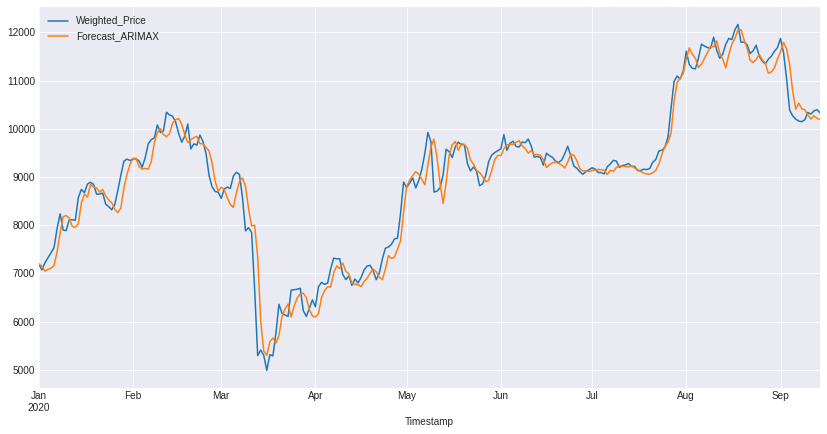

In [41]:
df_valid[["Weighted_Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))
print(df_valid['Weighted_Price'])
print(df_valid['Forecast_ARIMAX'])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

print("\nMPE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))



RMSE of Auto ARIMAX: 322.1831636813366

MAE of Auto ARIMAX: 226.99601399420382


In [53]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX,squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Explained Variance Score:', metrics.explained_variance_score(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Max Error:', metrics.max_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Median Absolute Error:', metrics.median_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('R^2:', metrics.r2_score(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

Mean Absolute Error (MAE): 226.99601399420382
Mean Squared Error (MSE): 103801.99095971495
Root Mean Squared Error (RMSE): 322.1831636813366
Mean Absolute Percentage Error (MAPE): 0.02692433786275729
Explained Variance Score: 0.9581486347316945
Max Error: 2045.910884085869
Mean Squared Log Error: 0.001672464851648391
Median Absolute Error: 165.09808640381152
R^2: 0.9572729895292947
Mean Poisson Deviance: 12.743595739829317
Mean Gamma Deviance: 0.0016273491036086865


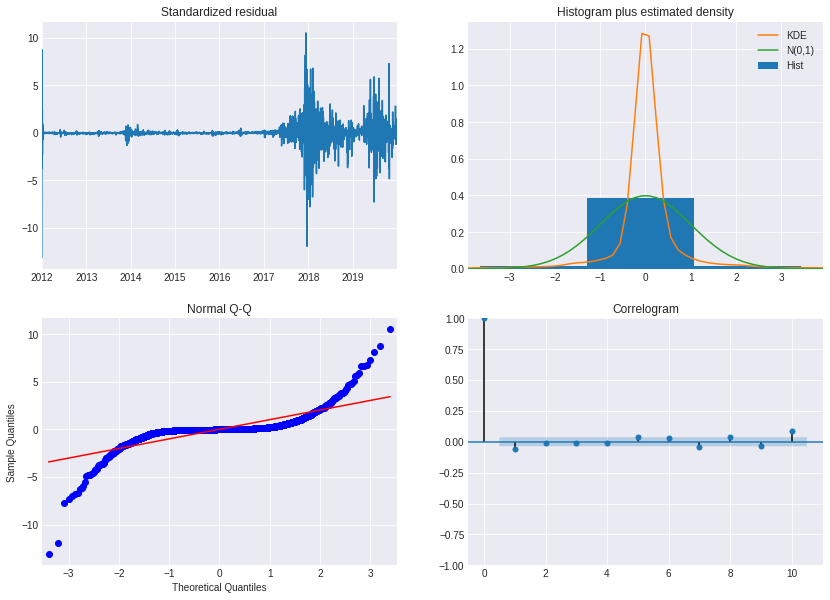

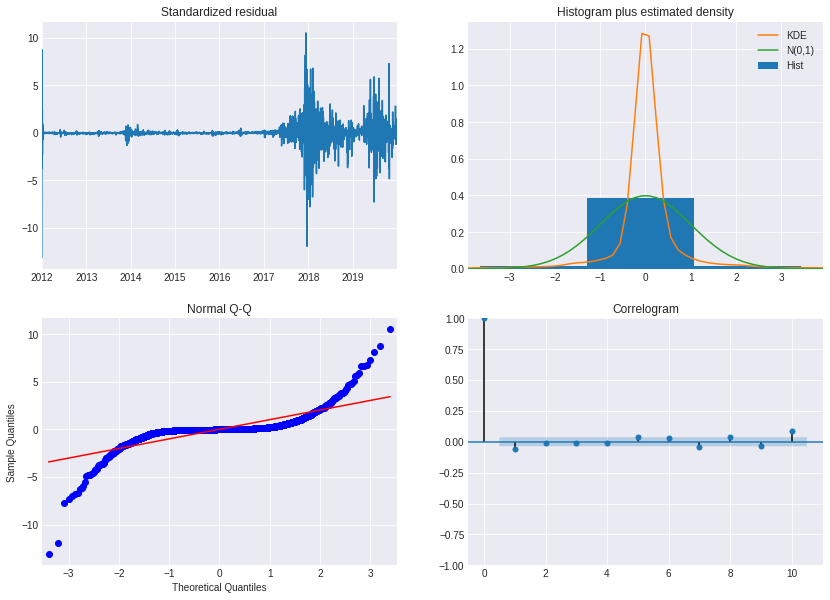

In [52]:
model.plot_diagnostics()

In [54]:
import pickle


# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

# loss_values = [ev['loss'] for ev in evaluations]
# training_steps = [ev['global_step'] for ev in evaluations]

# plt.scatter(x=training_steps, y=loss_values)
# plt.xlabel('Training steps (Epochs = steps / 2)')
# plt.ylabel('Loss (SSE)')
# plt.show()
pickle.dump(model, open('model.pkl','wb'))
# Loading model to compare the results
lstm = pickle.load(open('model.pkl','rb'))
# pred=lstm.predict(df['Weighted_Price'])